<a href="https://colab.research.google.com/github/Maria-lin/M1_SII_S1/blob/master/BLALAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# === Imports généraux ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, DatePicker, Dropdown,HBox, interactive_output

from datetime import date
# === Interactif ===
import ipywidgets as widgets
from datetime import date, timedelta

# Pour une meilleure lisibilité des graphes
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "IdentifiantRequeteVQR": range(1, 11),
    "Circuit": ["RVM", "On Us", "RVM", "On Us", "RVM", "RVM", "On Us", "RVM", "On Us", "RVM"],
    "Motif": [None, "Erreur F001", None, "Erreur F004", "Erreur F002", None, "Erreur F003", "Erreur F001", None, "Erreur F004"],
    "Statut": ["Match", "NOAP", "Almost match", "No match", "Match", "NOAP", "No match", "Almost match", "Match", "NOAP"],
    # ICI : génération sur 10 jours
    "TimestampReceptionVop": pd.date_range("2025-09-01", periods=10, freq="D"),
    "DelaiTraitement": np.random.randint(50, 500, size=10),
    "BicDonneurOrdre": ["BNPAFRPP", "SOGEFRPP", "LPSOFPP", "BNPAFRPP", "SOGEFRPP", "LPSOFPP", "BNPAFRPP", "SOGEFRPP", "LPSOFPP", "BNPAFRPP"],
    "BicTeneurCompte": ["CCBPFRPP", "CEPAFRPP", "LPSOFPP", "CEPAFRPP", "CCBPFRPP", "LPSOFPP", "CCBPFRPP", "CEPAFRPP", "LPSOFPP", "CCBPFRPP"],
    "DelaiRVM": np.random.randint(20, 300, size=10),
    "Canal": ["BEL", "APP", "BEL", "APP", "BEL", "APP", "BEL", "APP", "BEL", "APP"]
})

# Extraire uniquement la date (jour)
df["DateReceptionVop"] = df["TimestampReceptionVop"].dt.date

df


,IdentifiantRequeteVQR,Circuit,Motif,Statut,TimestampReceptionVop,DelaiTraitement,BicDonneurOrdre,BicTeneurCompte,DelaiRVM,Canal,DateReceptionVop
0,1,RVM,None,Match,2025-09-01,116,BNPAFRPP,CCBPFRPP,199,BEL,2025-09-01
1,2,On Us,Erreur F001,NOAP,2025-09-02,223,SOGEFRPP,CEPAFRPP,189,APP,2025-09-02
2,3,RVM,None,Almost match,2025-09-03,79,LPSOFPP,LPSOFPP,45,BEL,2025-09-03
3,4,On Us,Erreur F004,No match,2025-09-04,67,BNPAFRPP,CEPAFRPP,77,APP,2025-09-04
4,5,RVM,Erreur F002,Match,2025-09-05,52,SOGEFRPP,CCBPFRPP,50,BEL,2025-09-05
5,6,RVM,None,NOAP,2025-09-06,405,LPSOFPP,LPSOFPP,26,APP,2025-09-06
6,7,On Us,Erreur F003,No match,2025-09-07,448,BNPAFRPP,CCBPFRPP,79,BEL,2025-09-07
7,8,RVM,Erreur F001,Almost match,2025-09-08,168,SOGEFRPP,CEPAFRPP,171,APP,2025-09-08
8,9,On Us,None,Match,2025-09-09,261,LPSOFPP,LPSOFPP,194,BEL,2025-09-09
9,10,RVM,Erreur F004,NOAP,2025-09-10,250,BNPAFRPP,CCBPFRPP,198,APP,2025-09-10


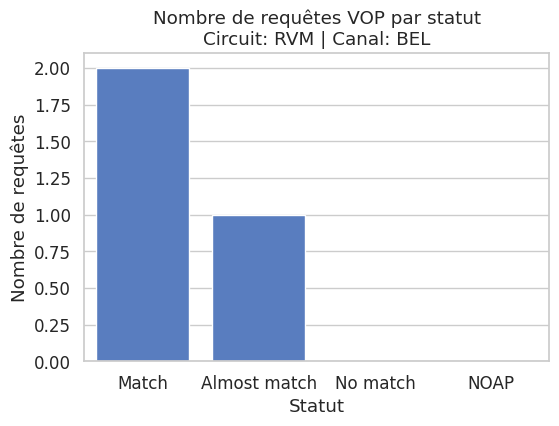

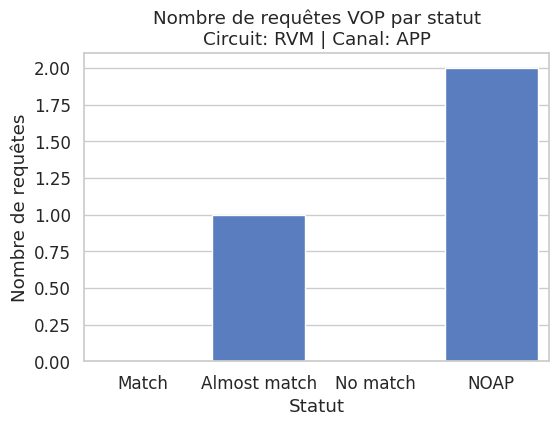

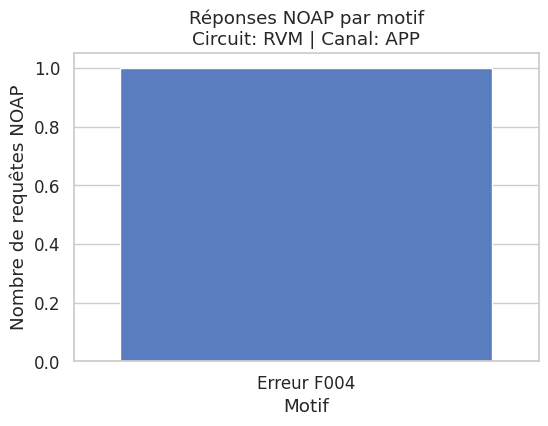

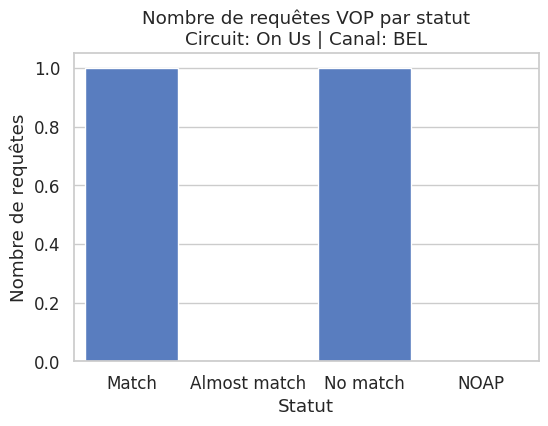

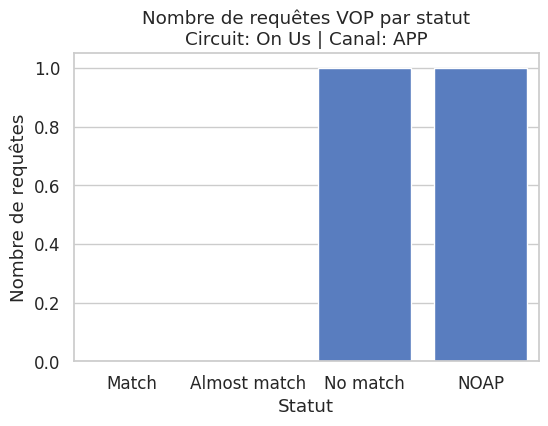

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Graphes par Circuit et Canal ===

def plot_use_case_1(df, circuit, canal):
    subset = df[(df["Circuit"] == circuit) & (df["Canal"] == canal)]

    # 1. Nombre de requêtes par statut
    plt.figure(figsize=(6,4))
    sns.countplot(data=subset, x="Statut", order=["Match", "Almost match", "No match", "NOAP"])
    plt.title(f"Nombre de requêtes VOP par statut\nCircuit: {circuit} | Canal: {canal}")
    plt.ylabel("Nombre de requêtes")
    plt.show()

    # 2. Nombre de NOAP par motif (seulement pour RVM)
    if circuit == "RVM":
        subset_noap = subset[subset["Statut"] == "NOAP"]
        if not subset_noap.empty:
            plt.figure(figsize=(6,4))
            sns.countplot(data=subset_noap, x="Motif")
            plt.title(f"Réponses NOAP par motif\nCircuit: {circuit} | Canal: {canal}")
            plt.ylabel("Nombre de requêtes NOAP")
            plt.show()

# Exemple d'appel :
plot_use_case_1(df, "RVM", "BEL")
plot_use_case_1(df, "RVM", "APP")
plot_use_case_1(df, "On Us", "BEL")
plot_use_case_1(df, "On Us", "APP")


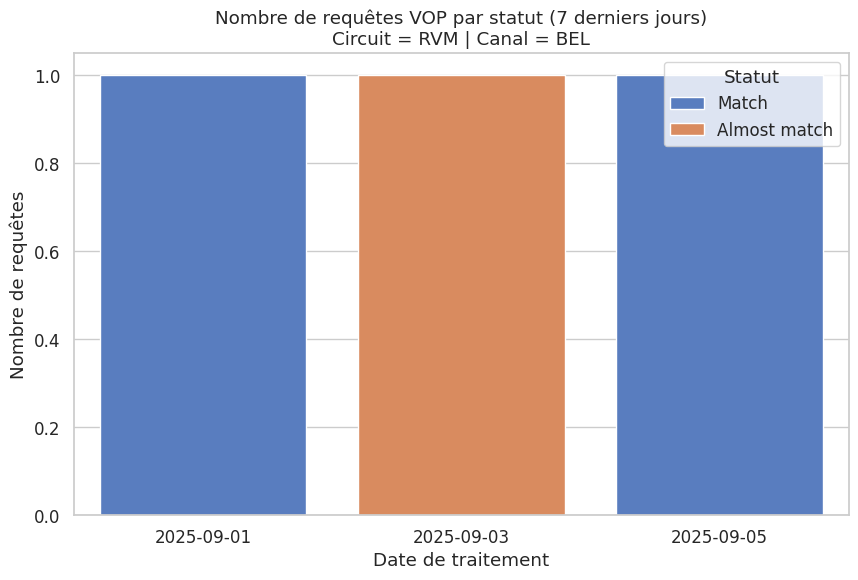

  DateReceptionVop        Statut  Nombre
0       2025-09-01         Match       1
1       2025-09-03  Almost match       1
2       2025-09-05         Match       1


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer Circuit = RVM et Canal = BEL
df_rvm_bel = df[(df["Circuit"] == "RVM") & (df["Canal"] == "BEL")]

# Sélectionner les 7 derniers jours distincts
last_days = df_rvm_bel["DateReceptionVop"].sort_values().unique()[-7:]
df_rvm_bel_last = df_rvm_bel[df_rvm_bel["DateReceptionVop"].isin(last_days)]

# Grouper par DateReceptionVop + Statut
statut_counts = df_rvm_bel_last.groupby(["DateReceptionVop", "Statut"]).size().reset_index(name="Nombre")

# Affichage graphique
plt.figure(figsize=(10,6))
sns.barplot(data=statut_counts, x="DateReceptionVop", y="Nombre", hue="Statut")
plt.title("Nombre de requêtes VOP par statut (7 derniers jours)\nCircuit = RVM | Canal = BEL")
plt.xlabel("Date de traitement")
plt.ylabel("Nombre de requêtes")
plt.legend(title="Statut")
plt.show()

print(statut_counts)


In [13]:
# --- Dates automatiques (7 derniers jours par rapport à hier) ---
today = date.today()
end_default = today - timedelta(days=1)          # hier
start_default = end_default - timedelta(days=6)  # 7 jours avant

# --- Widgets ---
start_picker = DatePicker(description='Date début', value=start_default)
end_picker = DatePicker(description='Date fin', value=end_default)
canal_dropdown = Dropdown(options=["BEL", "APP"], value="BEL", description="Canal")

# Les mettre côte à côte
ui = HBox([start_picker, end_picker, canal_dropdown])

# --- Fonction d'affichage ---
def plot_requetes_par_statut(start_date, end_date, canal):
    mask = (
        (df["DateReceptionVop"] >= start_date) &
        (df["DateReceptionVop"] <= end_date) &
        (df["Canal"] == canal)
    )
    df_filtered = df[mask]

    # Toujours afficher toutes les dates et statuts, même à 0
    statuts = ["Match", "Almost match", "No match", "NOAP"]
    all_dates = pd.date_range(start_date, end_date).date
    full_index = pd.MultiIndex.from_product([all_dates, statuts], names=["DateReceptionVop", "Statut"])
    df_full = pd.DataFrame(index=full_index).reset_index()
    df_full["Nombre"] = 0

    counts = df_filtered.groupby(["DateReceptionVop", "Statut"]).size().reset_index(name="Nombre")
    df_plot = df_full.merge(counts, on=["DateReceptionVop", "Statut"], how="left", suffixes=("_fill",""))
    df_plot["Nombre"] = df_plot["Nombre"].fillna(0).astype(int)

    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_plot, x="DateReceptionVop", y="Nombre", hue="Statut")
    plt.title(f"Nombre de requêtes VOPSur le circuit RVM par statut ({canal}) du {start_date} au {end_date}")
    plt.xlabel("Date de traitement")
    plt.ylabel("Nombre de requêtes")
    plt.legend(title="Statut")
    plt.show()

    return df_plot

# --- Lier widgets et fonction ---
out = interactive_output(plot_requetes_par_statut, {
    'start_date': start_picker,
    'end_date': end_picker,
    'canal': canal_dropdown
})

display(ui, out)

Output()